In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
stock_prices = pd.read_csv('Market+Risk+Dataset.csv')

#Glimpse of Data
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [13]:
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]

In [14]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

In [15]:
stock_returns.head()

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


In [16]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys                0.002794
Indian Hotel           0.000266
Mahindra & Mahindra   -0.001506
Axis Bank              0.001167
SAIL                  -0.003463
Shree Cement           0.003681
Sun Pharma            -0.001455
Jindal Steel          -0.004123
Idea Vodafone         -0.010608
Jet Airways           -0.009548
dtype: float64

In [17]:
stock_sd=stock_returns.std(axis=0)
stock_sd

Infosys                0.035070
Indian Hotel           0.047131
Mahindra & Mahindra    0.040169
Axis Bank              0.045828
SAIL                   0.062188
Shree Cement           0.039917
Sun Pharma             0.045033
Jindal Steel           0.075108
Idea Vodafone          0.104315
Jet Airways            0.097972
dtype: float64

In [18]:
new_df = pd.DataFrame({'Stock Means':stock_means, 'Stock Standard Deviation': stock_sd})
new_df

,Stock Means,Stock Standard Deviation
Infosys,0.002794,0.035070
Indian Hotel,0.000266,0.047131
Mahindra & Mahindra,-0.001506,0.040169
Axis Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree Cement,0.003681,0.039917
Sun Pharma,-0.001455,0.045033
Jindal Steel,-0.004123,0.075108
Idea Vodafone,-0.010608,0.104315
Jet Airways,-0.009548,0.097972


C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


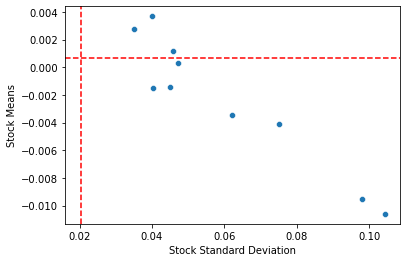

In [19]:
#plt.scatter(stock_sd, stock_means, edgecolors='r')
plot = sns.scatterplot(new_df['Stock Standard Deviation'], new_df['Stock Means'])
plot.axvline(x=0.020257,linestyle='--', color = "red")
plot.axhline(y=0.000683,linestyle='--', color = "red")

plt.show()